# Part I

##### Authors: Yimin You

## Introduction


* 1, estimate the average song duration in the playlist
* 2, a continuous analysis (parameter of interest is the mean song duration) and a binary analysis (parameter of interest is the proportion of songs longer than 180 seconds).
* 3, first: will be a Simple Random Sample, second: Stratified Sample stratified by song duration.

The dataset is collected from UCI Machine Learning Repository and the extraction was done by Barry Becker from the 1994 Census database.
The group will consider two response variables in the population. One of the parameters is the age of our samples, which we will treat as a continuous variable, and the other is the income, which in our dataset, is a factor with two levels: less than 50k, or more than 50k. We will then conduct both simple random sampling and stratified sampling method on continuous variable to estimate the mean age and binary variables to estimate the proportion of people with income over? 50k a year.


## Population Parameters

* 1, decide required sample size(N)
* 2, sample size for continuous population
* 3, sample size for binary population


## Data Summarizing

Once we load the data into R, we can see that our population size is 32561. From here, we decide on a sample size. For now, we arbitrarily decide on the number 2000, as it is reasonably sized, (can be realistically obtained by a method such as an online survey) and it is a nice number to split up when we discuss our stratified sampling results later. We use this value as our sample size for both our binary and continuous data analyses.

In [1]:
library(tidyverse)
library(GGally)
adult <- read.csv("adult.data", header = FALSE)
column_names <- c("age",
                  "workclass",
                  "final_weight",
                  "education", 
                  "education_num",
                  "marital_status",
                  "occupation",
                  "relationship",
                  "race",
                  "sex",
                  "capital_gain", 
                  "capital_loss", 
                  "hours_per_week", 
                  "native_country",
                  "income")
adult <- setNames(adult, column_names)
adult <- adult %>%
    mutate(income = as.factor(income))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### Simple Random Sample

In order to randomly generate an independent and identical sample, we use sample.int() function to draw 2000 indices from 32561 total indices. 

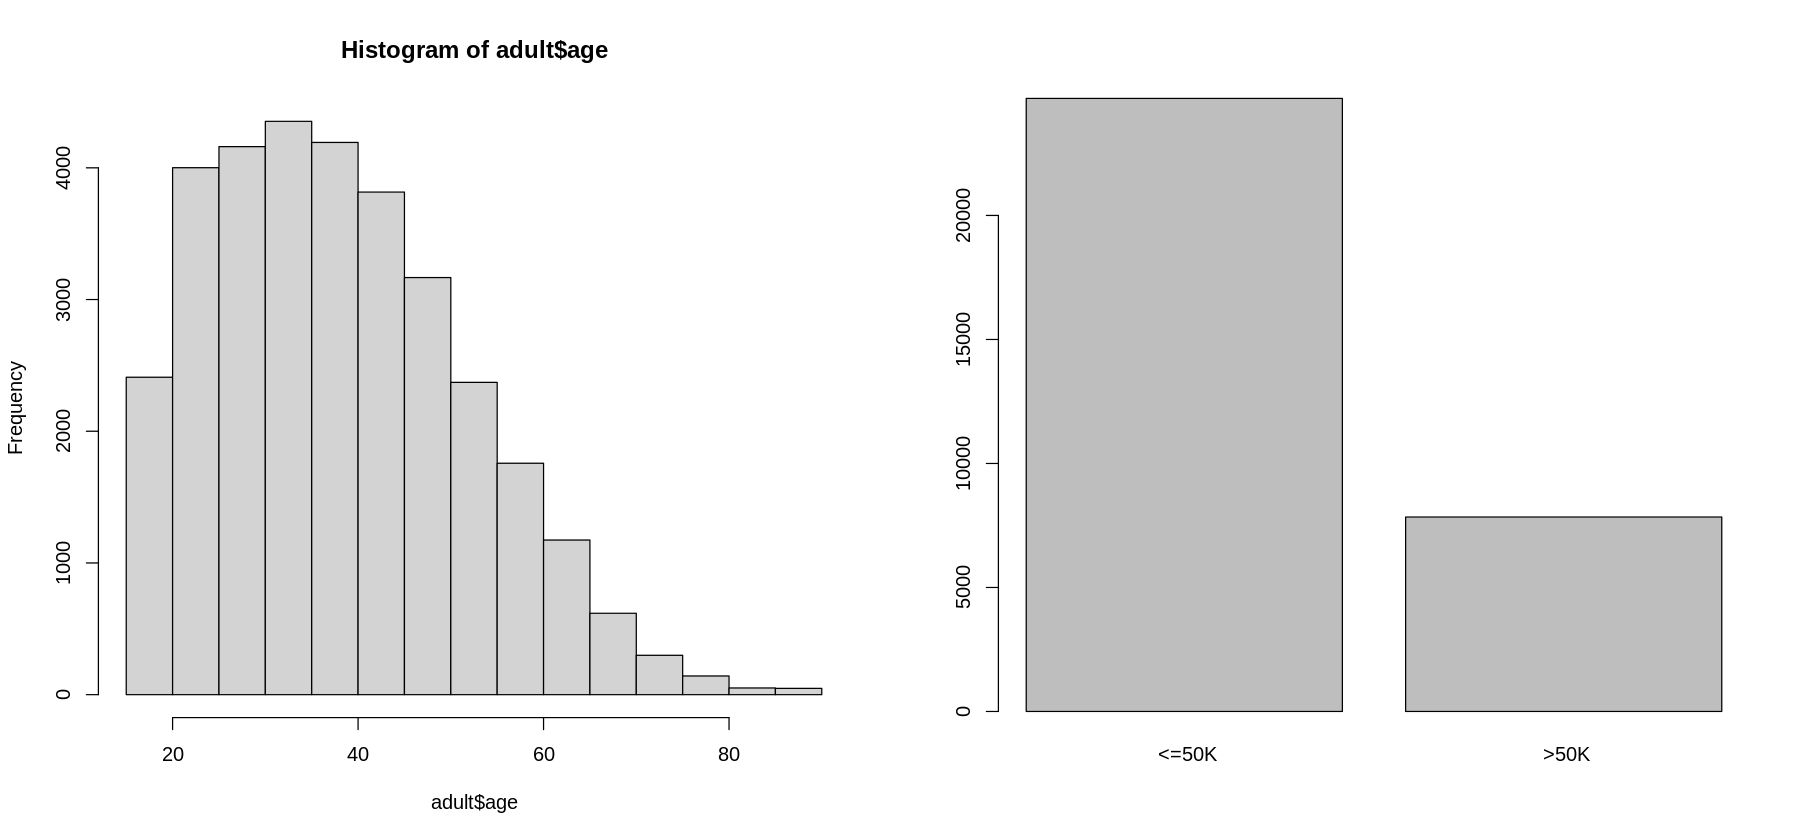

In [2]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow=c(1,2))
hist(adult$age)
barplot(table(adult$income))

The histogram for continuous variable age is right-skewed with majorities between 20 years old and 50 years old with a peak around 30 years old, noticing that there is no population aging in 1994 when the census was being collected. From the barplot, more than two thirds of the sample are making less than 50K a year.

# Part II
## Analysis and Comparison

### Simple Random Sample

A simple random sample maximizes the randomness of the data we obtain, meaning we have very little control as to how the data will be distributed. Intuitively, this may suggest that the sample we collect will be representative of the population. However, there is a remote chance that the sample we collect may not be fully representative of our dataset. At this point, we will have to assume that our sample will be fully representative, and that our members in our sample all had an equal chance of being selected to be in our sample.

#### Binary Population
Recall that our response variable is the proportion of people that have an income greater that 50K. Sampling from our population, we obtain the sampled mean, 0.2405, with a standard error of [insert equation] 0.0093. The 95% confidence interval is [insert equation], which is [0.2224, 0.2596].
Through our simple random sample as well as utilizing the Central Limit Theorem, our high sample size yields a normal sampling distribution with a mean of 0.2405. From this, we are 95% confident that the true proportion of people with an income greater than 50K is between 0.2224 and 0.2596. 

|     | Value  |   
| :----------: | :----------: | 
| Sample Proportion|0.2405
| Sample SE|0.0093
| Lower CI|0.2224
| Upper CI|0.2586

#### Continous Population
We use the sample mean (ȳs= 𝚺yi/n) to estimate the population mean age for continuous parameter. Using the sample standard deviation, we are able to calculate the standard error using se(ȳs) = √(1-n/N)*Ss. The 95% confidence interval is measured by …

|     | Value  |   
| :----------: | :----------: | 
| Sample Mean|38.78
| Sample SE|0.3039
| Lower CI|38.1844
| Upper CI|39.3756

According to the output, the sample mean is 38.78 with a standard error of 0.3039. As the sample size is large enough, by the central limit theorem, the sample mean will be normal, thus we are 95% confident that the true population mean is between … and ...

## Stratified Sampling

In comparison with a simple random sampling, we can divide the population into sub-populations, then apply random sampling of each subgroups to more accurately reflect the population studied based on a set of chosen characteristics.

* Assumptions:

> All observations must be exactly under one and only one stratum.

> Sampling from each stratum must be random\n",

* Hypothesis:

> The value of the parameters chosen are the same across all stratum (marital status), that is , 1.) the proportion of personal income that exceeds $50K/yr is the same across all stratum, and 2.) the mean age of individuals are the same across all stratum (marital status).


## Analysis and Comparison

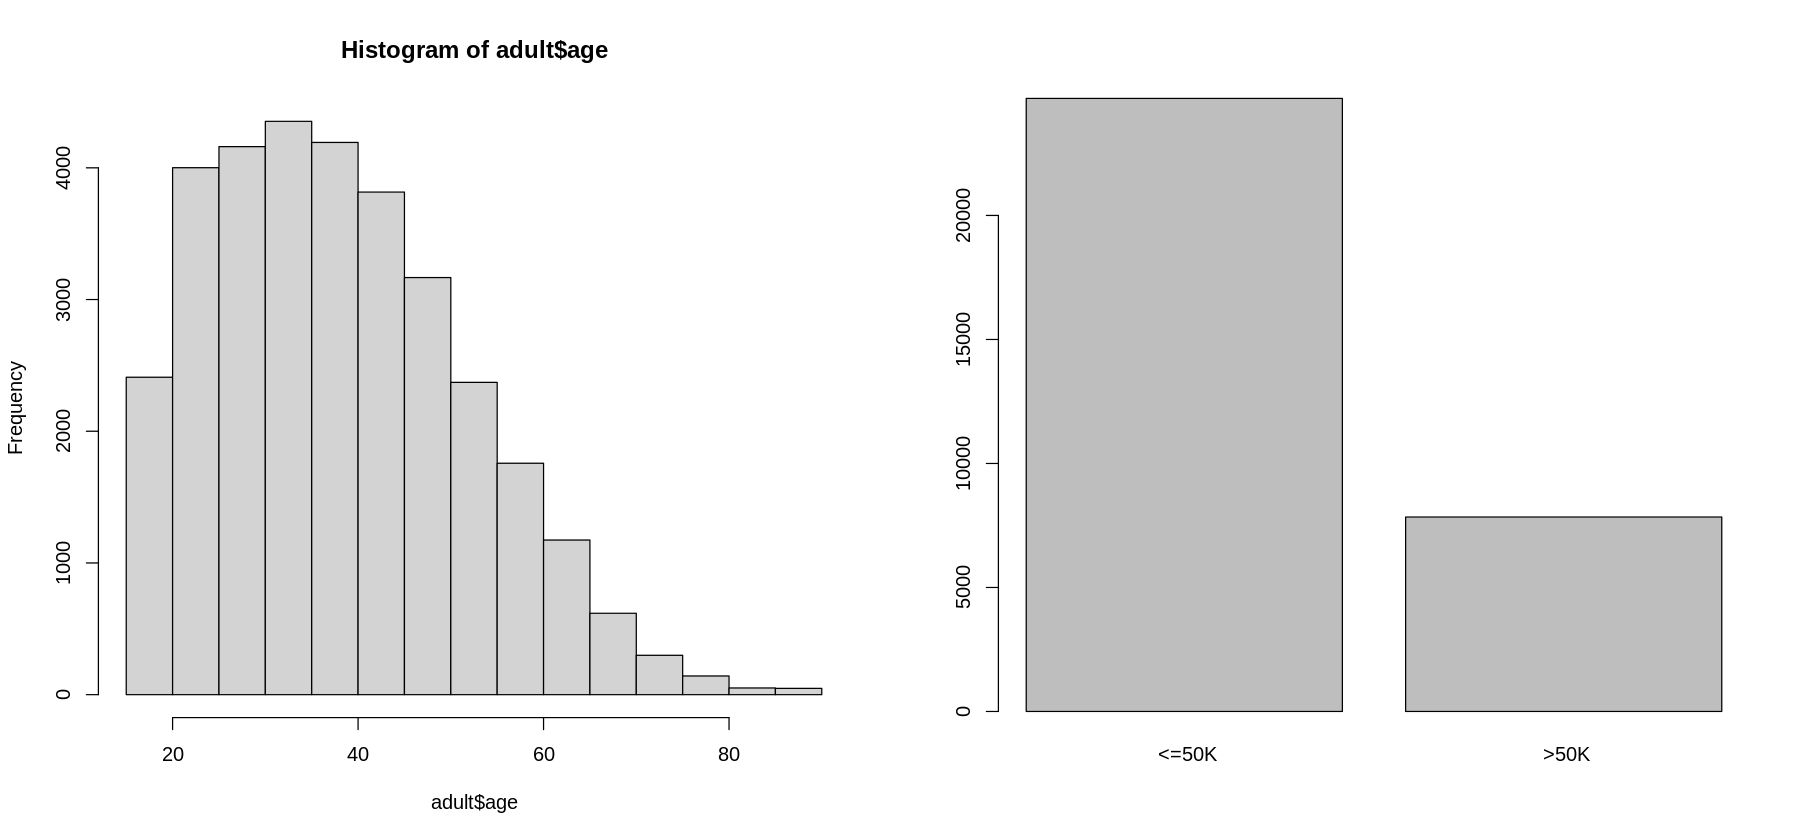

In [3]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow=c(1,2))
hist(adult$age)
barplot(table(adult$income))

In [4]:
head(adult)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<fct>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


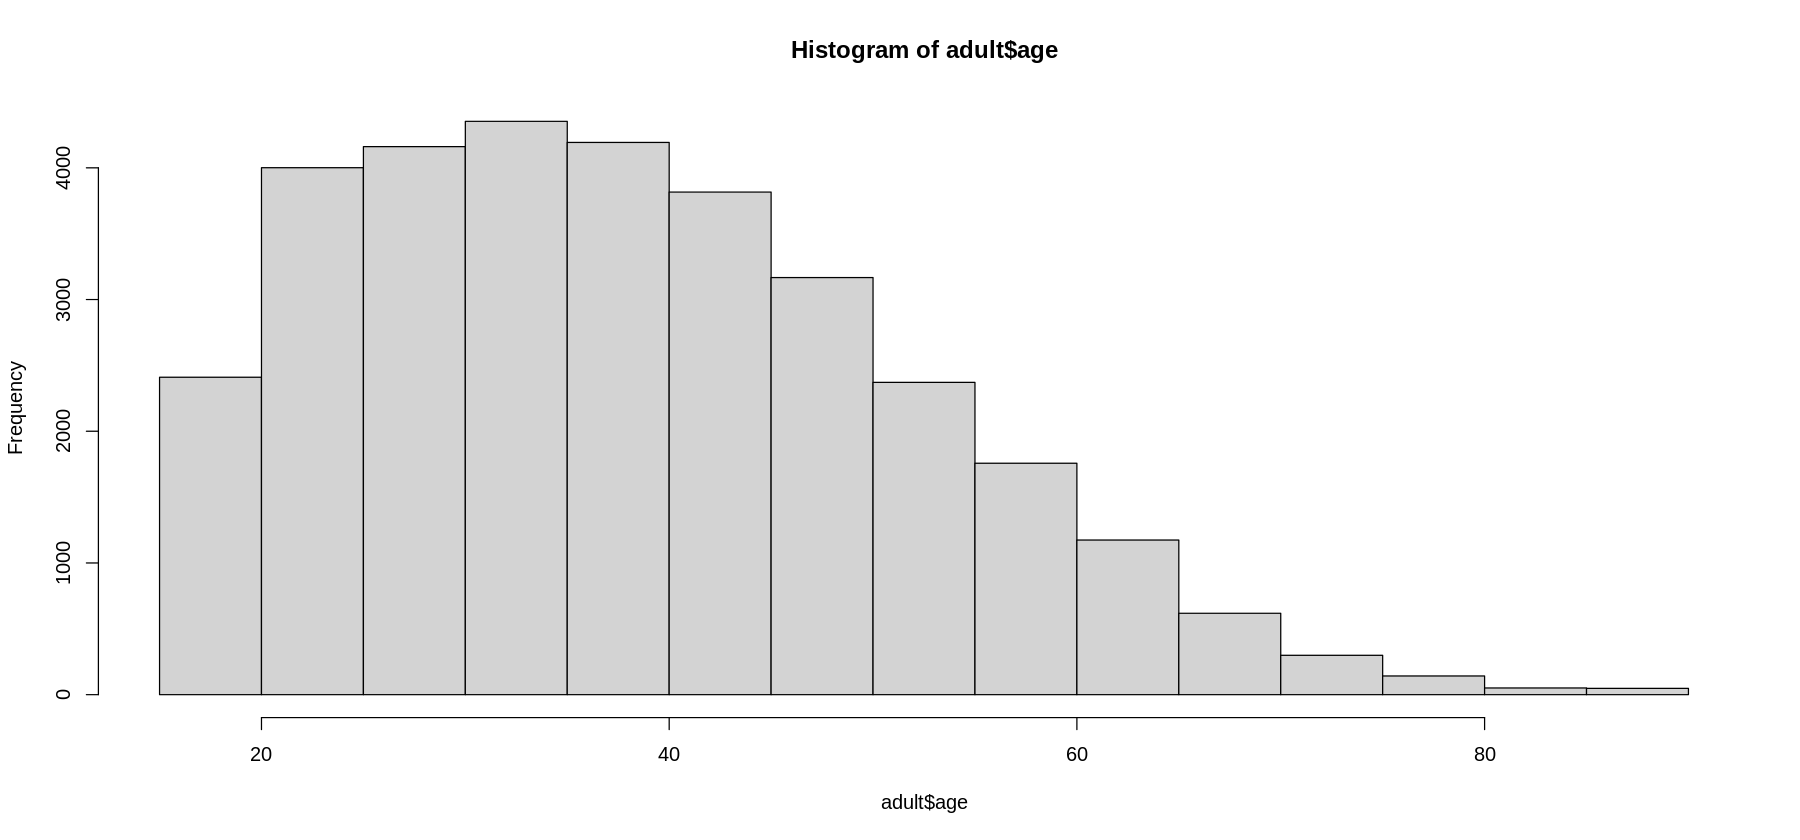

In [5]:
age_His <- hist(adult$age)

### SRS

In [6]:
### Continous Population
set.seed(344)

N <- nrow(adult)
N
n <- 2000

SRS.index <- sample.int(N, n, replace = FALSE) 
adultsample <- adult[SRS.index, ]

ybar <- mean(adultsample$age)
s_sd <- sd(adultsample$age)
se_ybar <- sqrt((1-n/N)*(s_sd^2/n))
round(ybar,4)
#s_sd
round(se_ybar,4)

round(c(ybar - 1.96 * se_ybar, ybar + 1.96 * se_ybar),4)

[1] 32561

[1] 38.78

[1] 0.3039

[1] 38.1844 39.3756

|     | Value  |   
| :----------: | :----------: | 
| Sample Mean|38.78
| Sample SE|0.3039
| Lower CI|38.1844
| Upper CI|39.3756

In [7]:
### Binary Population
set.seed(344)

N <- nrow(adult)
n <- 2000

SRS.index <- sample.int(N, n, replace = FALSE) 
adultsample <- adult[SRS.index, ]

income <- adultsample %>%
    group_by(income) %>%
    summarize(n = n())

p_hat <- income[2,2]/n
p_hat = pull(p_hat)
round(p_hat, 4)

phat_se = sqrt((1-n/N)*p_hat*(1-p_hat)/n)
round(phat_se, 4)

round(c(p_hat - 1.96 * phat_se, p_hat + 1.96 * phat_se),4)

[1] 0.2405

[1] 0.0093

[1] 0.2224 0.2586

|     | Value  |   
| :----------: | :----------: | 
| Sample Proportion|0.2405
| Sample SE|0.0093
| Lower CI|0.2224
| Upper CI|0.2586

## Stratified Sampling

### Continuous Parameter Estimation

In [8]:
level <- as.character(levels(as.factor(adult$marital_status)))
status <- as.character(adult$marital_status)
for (i in 1:length(status)) {
    ifelse (status[i] == level[2] | status[i] == level[3] | status[i] == level[4], 
            status[i] <- " Married", 
            status[i] <- status[i])
}

[1] " Divorced"              " Married-AF-spouse"     " Married-civ-spouse"   
[4] " Married-spouse-absent" " Never-married"         " Separated"            
[7] " Widowed"

In [9]:
n = 2000 ## we set sample size to be 1000
N = nrow(adult) ## population size
## Get pproportional stratum sizes
adult$status <- as.factor(status)

marital_ns <- adult %>%
    group_by(status) %>%
    summarise(nn = n(), prop = n()/N, var = var(age), sd = sd(age)) %>%
    mutate(nc = nn*sd) %>%
    mutate(nprop = nc/sum(nc)) %>%
    mutate(nh = round(nprop*n))
marital_ns

status,nn,prop,var,sd,nc,nprop,nh
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Divorced,4443,0.13645158,108.1682,10.40040,46208.96,0.12740224,255
Married,15417,0.47348054,145.8976,12.07881,186218.98,0.51342242,1027
Never-married,10683,0.32809189,100.1449,10.00724,106907.35,0.29475315,590
Separated,1025,0.03147938,117.4184,10.83598,11106.88,0.03062265,61
Widowed,993,0.03049661,152.4127,12.34555,12259.14,0.03379954,68


since nn for Married-AF-spouse, Married-civ-spouse and Married-spouse-absent are too small, so we combine them into Married status.



In [10]:
## Stratums
marital_levels <- levels(adult$status)
nn <- marital_ns$nn
nvar <- marital_ns$var
nh <- marital_ns$nh

Divorced_sample <- adult %>%
    filter(status == marital_levels[1]) %>%
    pull(age) %>%
    sample(nh[1])

Married_sample <- adult %>%
    filter(status == marital_levels[2]) %>%
    pull(age) %>%
    sample(nh[2])

NeverMarried_sample <- adult %>%
    filter(status == marital_levels[3]) %>%
    pull(age) %>%
    sample(nh[3])

Separated_sample <- adult %>%
    filter(status == marital_levels[4]) %>%
    pull(age) %>%
    sample(nh[4])

Widowed_sample <- adult %>%
    filter(status == marital_levels[5]) %>%
    pull(age) %>%
    sample(nh[5])

[1] " Divorced"      " Married"       " Never-married" " Separated"    
[5] " Widowed"

* ##### Formula<br>
The estimate for the mean age is $\bar{y}_{str} = \sum_{h=1}^{H} ((\frac{N_{h}}{N})\bar{y}_{h}) $, when $N_{h}$ is the size of the $h^{th}$ strata, $N$ is the population size, and $\bar{y}_{h}$ is the mean age of $h^{th}$ strata. the standard error for this estimate is $SE_{\bar{y}_{str}} =  \sqrt{\sum_{h=1}^{H}((\frac{N_{h}}{N})^2SE_{\bar{y}_h}}$, where $SE_{\bar{y}_h} = \sqrt{(1-\frac{n}{N})*\frac{S^2_{h}}{n}}$ with $S_{h}$ being the standard deviation of the $h^{th}$ strata. The 95% confidence interval for $\bar{y}_{str}$ is $\bar{y}_{s}\pm 1.96*SE_{\bar{y}_{str}}$

In [11]:
## Estmitated mean age and SE
Divorced_est <- (nh[1]/n)*mean(Divorced_sample)
Married_est <- (nh[2]/n)*mean(Married_sample)
NeverMarried_est <- (nh[3]/n)*mean(NeverMarried_sample)
Separated_est <- (nh[4]/n)*mean(Separated_sample)
Widowed_est <- (nh[5]/n)*mean(Widowed_sample)

ybarhat <- sum(c(Divorced_est,Married_est,NeverMarried_est,Separated_est,Widowed_est))

## estimate SE
Divorced_se <- ((nn[1]/N)^2) * (1-(nh[1]/n))*(nvar[1]/nh[1])
Married_se <- ((nn[2]/N)^2) * (1-(nh[2]/n))*(nvar[2]/nh[2])
NeverMarried_se <- ((nn[3]/N)^2) * (1-(nh[3]/n))*(nvar[3]/nh[3])
Separated_se <- ((nn[4]/N)^2) * (1-(nh[4]/n))*(nvar[4]/nh[4])
Widowed_se <- ((nn[5]/N)^2) * (1-(nh[5]/n))*(nvar[5]/nh[5])

yhatse <- sum(c(Divorced_se,Married_se,NeverMarried_se,Separated_se,Widowed_se))

result_data <- data.frame(Estimate = ybarhat, SE = yhatse, true_parameter = mean(adult$age))
result_data

Estimate,SE,true_parameter
<dbl>,<dbl>,<dbl>
39.0705,0.03912924,38.58165


In [12]:
phat.str.me <-1.96*yhatse
phat.str.confint <-c(ybarhat-phat.str.me,ybarhat+phat.str.me)
str.matrix <-matrix(c("SampleMean.","SE","LowerBound95%CI",
"Upper Bound95%CI",
round(ybarhat,3), round(yhatse,3),
round(phat.str.confint[1],3),
round(phat.str.confint[2],3)), nrow=4)
knitr::kable(x =str.matrix,col.names=c("","Value"))



|                 |Value  |
|:----------------|:------|
|SampleMean.      |39.07  |
|SE               |0.039  |
|LowerBound95%CI  |38.994 |
|Upper Bound95%CI |39.147 |

* ###### RESULT<br>
From our result, the estimate for mean age is 39.359. The standard error for this estimate is 0.03912924, Since our sample size sufficiently large (bigger than 25), by the central limit theorem, the distribution of our sample mean will be approximately normally distributed among many sample means. Therefore, we can conclude that we are 95% confident that the true mean age is between 39.282 and 39.436.

### Binary Parameter Estimation

In [13]:
stratum_n <-adult %>% 
    group_by(race) %>% 
    summarise(stratum_size = n()) %>%
    pull(stratum_size)
stratum_n

[1]   311  1039  3124   271 27816

In [14]:
income_n_by_stratum <- adult %>% 
    group_by(income, race) %>% 
    summarise(n = n(),
              .groups = "drop")
stratum_size <- c(rep(stratum_n,2)) 
income_n_by_stratum$stratum_size <- stratum_size
income_prop_by_stratum <- income_n_by_stratum %>% mutate(p = n/stratum_size,
                               var = p*(1-p)) %>% slice(1:5)
income_prop_by_stratum

income,race,n,stratum_size,p,var
<fct>,<chr>,<int>,<int>,<dbl>,<dbl>
<=50K,Amer-Indian-Eskimo,275,311,0.8842444,0.10235626
<=50K,Asian-Pac-Islander,763,1039,0.7343600,0.19507541
<=50K,Black,2737,3124,0.8761204,0.10853348
<=50K,Other,246,271,0.9077491,0.08374069
<=50K,White,20699,27816,0.7441401,0.19039563


In [15]:
n <- 3000
numerator <- income_prop_by_stratum$stratum_size * income_prop_by_stratum$var
n_h <- n*numerator/sum(numerator)
income_stratify_data <- income_prop_by_stratum %>% mutate(n_h = round(n_h))
income_stratify_data
sum(income_stratify_data$n_h)

income,race,n,stratum_size,p,var,n_h
<fct>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
<=50K,Amer-Indian-Eskimo,275,311,0.8842444,0.10235626,16
<=50K,Asian-Pac-Islander,763,1039,0.7343600,0.19507541,103
<=50K,Black,2737,3124,0.8761204,0.10853348,173
<=50K,Other,246,271,0.9077491,0.08374069,12
<=50K,White,20699,27816,0.7441401,0.19039563,2696


[1] 3000

In [19]:
binary_stratify_data <- adult %>% select(race, income)
level <- levels(as.factor(binary_stratify_data$race))
Amer <- binary_stratify_data %>% filter(race == level[1]) %>% pull(income)
Asian <- binary_stratify_data %>% filter(race == level[2]) %>% pull(income)
Black <- binary_stratify_data %>% filter(race == level[3]) %>% pull(income)
Other <- binary_stratify_data %>% filter(race == level[4]) %>% pull(income)
White <- binary_stratify_data %>% filter(race == level[5]) %>% pull(income)

,race,income
,<chr>,<fct>
1,White,<=50K
2,White,<=50K
3,White,<=50K
4,Black,<=50K
5,Black,<=50K
6,White,<=50K


In [20]:
set.seed(344)
n_h <- income_stratify_data$n_h
amer_sample <- sample(as.character(Amer), n_h[1])
asian_sample <- sample(as.character(Asian), n_h[2])
black_sample <- sample(as.character(Black), n_h[3])
other_sample <- sample(as.character(Other), n_h[4])
white_sample <- sample(as.character(White), n_h[5])

[1] " <=50K" " >50K"

In [23]:
amer_prop <- mean(amer_sample == " >50K")
asian_prop <- mean(asian_sample == " >50K")
black_prop <- mean(black_sample == " >50K")
other_prop <- mean(other_sample == " >50K")
white_prop <- mean(white_sample == " >50K")
props <- c(amer_prop, asian_prop, black_prop, other_prop, white_prop)
prop_est <- sum(n_h*props/n)
prop_est

[1] 0.256

In [28]:
amer_var = amer_prop*(1-amer_prop)/n_h[1]
asian_var = asian_prop*(1-asian_prop)/n_h[2]
black_var = black_prop*(1-black_prop)/n_h[3]
other_var = other_prop*(1-other_prop)/n_h[4]
white_var = white_prop*(1-white_prop)/n_h[5]
prop_var = c(amer_var, asian_var, black_var, other_var, white_var)
pooled_se = sqrt(sum(prop_var*(n_h/n)^2))
pooled_se

[1] 0.007950903

In [33]:
data.frame(name = c("Proportion Estimate", "Proportion SE", "Lower Bound", "Upper Bound"),
           value = c(prop_est,round(pooled_se,5),prop_est - 1.96*pooled_se,prop_est + 1.96*pooled_se))

name,value
<chr>,<dbl>
Proportion Estimate,0.2560000
Proportion SE,0.0079500
Lower Bound,0.2404162
Upper Bound,0.2715838


## Discussion 

## Conclusion 

# Part II